In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Scatterplot of Mean Precipitation by Year

In [2]:
climate_data = pd.read_csv('https://raw.githubusercontent.com/HeardLibrary/digital-scholarship/master/data/codegraf/mesa2880172.csv')
climate_data['YEAR'] = climate_data['DATE'].str.slice(0, 4)
climate_data['MONTH'] = climate_data['DATE'].str.slice(5, 6)

all_years = range(1896, 2018)
prcp_means = []
for years in all_years:
    year_rows = climate_data[climate_data['YEAR'] == str(years)]
    year_avg_prcp = year_rows['PRCP'].mean()
    if not np.isnan(year_avg_prcp):
        year_dict = {'Year': years, 'Avg Precipitation': year_avg_prcp}
        prcp_means.append(year_dict)
prcp_means_df = pd.DataFrame(prcp_means)
prcp_means_df.head()

,Year,Avg Precipitation
0,1896,25.187500
1,1897,19.041667
2,1898,16.591667
3,1899,11.675000
4,1900,10.791667


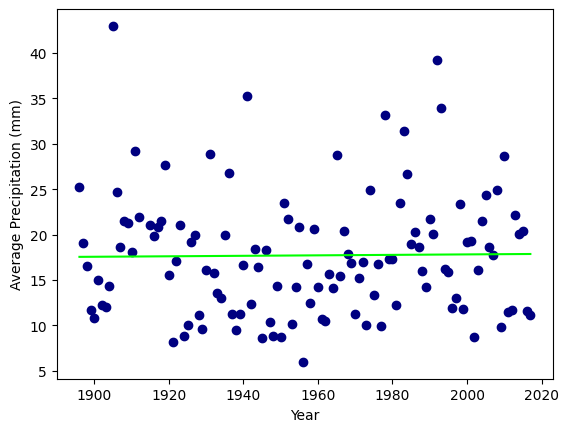

In [3]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(prcp_means_df['Year'], prcp_means_df['Avg Precipitation'], color= 'navy')

ax.set_xlabel('Year')
ax.set_ylabel('Average Precipitation (mm)')
# add a blue trendline to my data
z = np.polyfit(prcp_means_df['Year'], prcp_means_df['Avg Precipitation'], 1)
p = np.poly1d(z)
ax.plot(prcp_means_df['Year'], p(prcp_means_df['Year']), color='lime')


Scatterplot of Mean Temperature by Year

In [4]:
climate_data = pd.read_csv('https://raw.githubusercontent.com/HeardLibrary/digital-scholarship/master/data/codegraf/mesa2880172.csv')
climate_data['YEAR'] = climate_data['DATE'].str.slice(0, 4)
climate_data['MONTH'] = climate_data['DATE'].str.slice(5, 6)

all_years = range(1896, 2018)
temp_means = []
for years in all_years:
    year_rows = climate_data[climate_data['YEAR'] == str(years)]
    year_avg_temp = year_rows['TAVG'].mean()
    if not np.isnan(year_avg_temp):
        year_dict = {'Year': years, 'Avg Temperature': year_avg_temp}
        temp_means.append(year_dict)
temp_means_df = pd.DataFrame(temp_means)
temp_means_df.head()

,Year,Avg Temperature
0,1896,21.437500
1,1897,20.150000
2,1898,20.225000
3,1899,19.491667
4,1900,20.691667


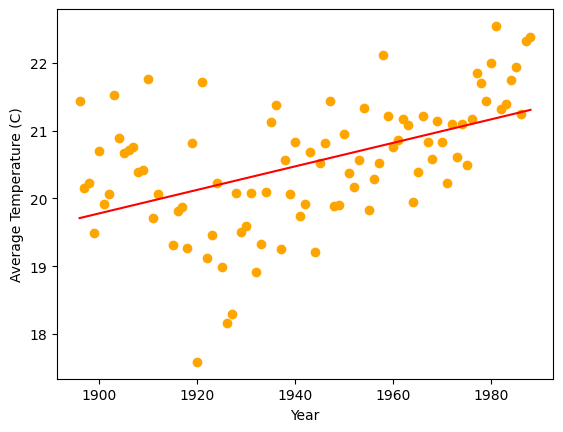

In [5]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(temp_means_df['Year'], temp_means_df['Avg Temperature'], color= 'orange')

ax.set_xlabel('Year')
ax.set_ylabel('Average Temperature (C)')

z = np.polyfit(temp_means_df['Year'], temp_means_df['Avg Temperature'], 1)
p = np.poly1d(z)
ax.plot(temp_means_df['Year'], p(temp_means_df['Year']), color='red')

Bar Plot for Mean Precipitation by Month

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

climate_data['DATE'] = pd.to_datetime(climate_data['DATE'])
climate_data['MONTH'] = climate_data['DATE'].dt.month_name()
monthly_precipitation = climate_data.groupby('MONTH')['PRCP'].mean()
monthly_precipitation = monthly_precipitation.reindex(list(calendar.month_name)[1:])
monthly_precipitation

MONTH
January      23.711966
February     22.303390
March        22.557265
April         8.616667
May           3.804202
June          2.125210
July         23.752500
August       29.233613
September    20.482353
October      14.197458
November     16.575424
December     25.489655
Name: PRCP, dtype: float64

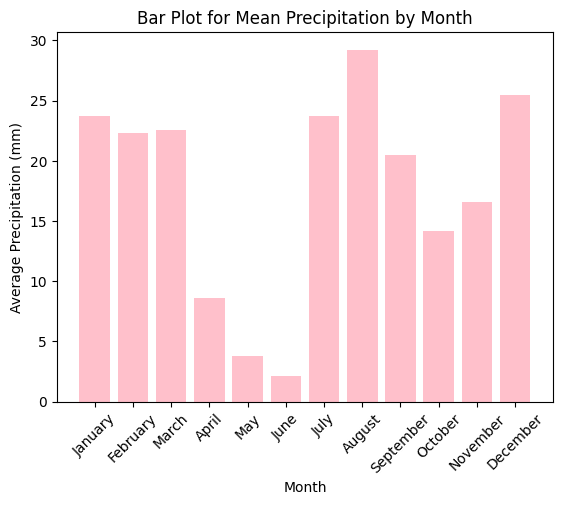

In [26]:
plt.bar(monthly_precipitation.index, monthly_precipitation.values, color='pink')

plt.xlabel('Month')
plt.ylabel('Average Precipitation (mm)')
plt.title('Bar Plot for Mean Precipitation by Month')
plt.xticks(rotation=45)
plt.show()


Error bar plot with mean temperature by month

In [28]:
climate_data['DATE'] = pd.to_datetime(climate_data['DATE'])
climate_data['MONTH'] = climate_data['DATE'].dt.month_name()

monthly_mean_temp = climate_data.groupby('MONTH')['TAVG'].mean()
mean_max = climate_data.groupby('MONTH')['TMAX'].mean()
mean_min = climate_data.groupby('MONTH')['TMIN'].mean()

monthly_mean_temp = monthly_mean_temp.reindex(list(calendar.month_name)[1:])
monthly_mean_temp

MONTH
January      10.388372
February     12.378652
March        14.977528
April        18.952222
May          23.411364
June         28.513793
July         31.587640
August       30.605814
September    27.601149
October      21.423864
November     14.892941
December     10.898780
Name: TAVG, dtype: float64

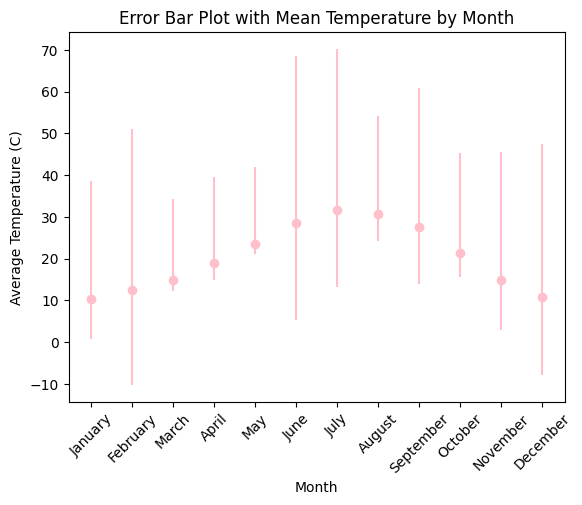

In [29]:
plt.errorbar(monthly_mean_temp.index, monthly_mean_temp.values, yerr=[mean_min.values, mean_max.values], color='pink', fmt='o')

plt.xlabel('Month')
plt.ylabel('Average Temperature (C)')
plt.title('Error Bar Plot with Mean Temperature by Month')
plt.xticks(rotation=45)
plt.show()
